# **Sales Spectrum: Monthly and Weekly Edition**
**Date**: 21st December, 2024

**Dataset**: [TV Sales Forecasting](https://www.kaggle.com/datasets/nomanvb/tv-sales-forecast)


**About the Dataset**: 
Given data contains Jan-2014 to Aug-2016 daily TV sales quantity. There are total 124 Models. This data is collected from one of the leading brand of Bangladesh. Annually there are two big festivals (EID) which follows Islamic lunar calendar.
provided data are in csv format. it contains only three columns.
- Date: Date of Sale
- Model: TV Model (not Original)
- Count: Sale Quantity

**Aim of the Project**:
The aim of this project is to develop a Sales Forecasting System for predicting both weekly and monthly sales using time series models like ARIMA. It seeks to identify patterns and trends in sales data to enhance operational planning and inventory management. The system provides accurate forecasts with confidence intervals, enabling businesses to make informed, data-driven decisions. By integrating user-friendly visualization tools, it ensures easy interpretation of results. This project ultimately supports strategic planning by anticipating sales fluctuations effectively.

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import pickle

In [365]:
df = pd.read_csv("Date and model wise sale.csv")

This code converts the **'Date'** column of the DataFrame df from string format to **datetime objects** for easier manipulation. The format='%d-%b-%y' specifies the date format with day (%d), abbreviated month (%b), and two-digit year (%y). For example, **'01-Jan-23'** becomes **2023-01-01**. This conversion is essential for time-based analysis and operations.

In [366]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [367]:
df.head()

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57


Checking for any **missing values** in the Dataset.

In [368]:
df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

This code extracts specific components of the Date column in a DataFrame for further analysis:
- **df['Year']**: Extracts the year from each date and stores it in a new column named 'Year'.
- **df['Month']**: Extracts the month (as a numeric value) from each date and stores it in a new column named 'Month'.
- **df['Day']**: Extracts the day of the month from each date and stores it in a new column named 'Day'.
- **df['Day_of_Week']**: Extracts the day of the week (as an integer, where Monday=0, Sunday=6) and stores it in a new column named 'Day_of_Week'.

These extracted features can be helpful for time-based analysis and identifying trends or patterns.

In [369]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [370]:
df.head()

,Date,Model,Count,Year,Month,Day,Day_of_Week
0,2016-08-31,M45,5,2016,8,31,2
1,2016-08-31,M121,3,2016,8,31,2
2,2016-08-31,M122,4,2016,8,31,2
3,2016-08-31,M91,10,2016,8,31,2
4,2016-08-31,M66,57,2016,8,31,2


The Dataset consists of **46,116** rows and **7** columns.

In [371]:
df.shape

(46116, 7)

Groups the DataFrame df by unique dates in the **'Date'** column. Sums the **'Count'** values for each date group. Resets the index to return a new DataFrame with **'Date'** and aggregated **'Count'**.

In [372]:
grouped_data = df.groupby('Date')['Count'].sum().reset_index()

In [373]:
grouped_data.head()

,Date,Count
0,2014-01-01,395
1,2014-01-02,4
2,2014-01-03,1
3,2014-01-04,2
4,2014-01-07,2


The line plot shows the **trend of total sales counts** over **time**, with data points marked by circles. It highlights patterns, such as increases, decreases, or seasonal fluctuations in sales over the observed period. The grid and legend enhance readability, making it easier to interpret the sales count against the dates.

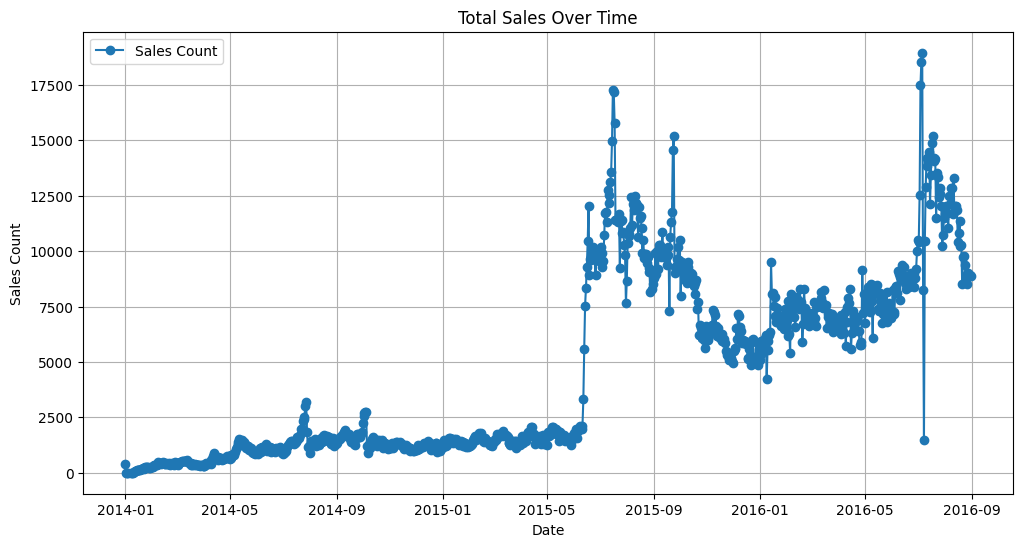

In [374]:

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Date'], grouped_data['Count'], marker='o', label='Sales Count')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.grid(True)
plt.legend()
plt.show()

**Data Grouping**: It groups the sales data by **month (df.groupby('Month'))** and calculates the **total sales ('Count')** for each month using sum(). It then resets the index for the grouped data.

A bar plot is created to display the total sales count for each month. The sns.barplot() function from the Seaborn library is used, and the color palette 'viridis' is applied for visual appeal. The plot is titled **'Monthly Sales Trend'**, with labels for the **X-axis ('Month')** and **Y-axis ('Total Sales Count')**, followed by plt.show() to display the plot.

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28592\1161858048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Count', data=monthly_data, palette='viridis')


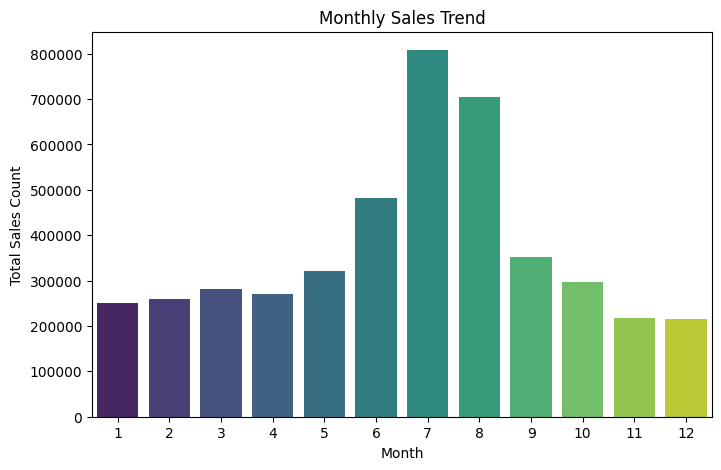

In [375]:
# Visualize monthly trends (if enough data exists)
monthly_data = df.groupby('Month')['Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Count', data=monthly_data, palette='viridis')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Count')
plt.show()

The sales data is grouped by the **day of the week (df.groupby('Day_of_Week'))**, and the **total sales count** is calculated for each day using sum(). The grouped data is then reset using reset_index().

A bar plot is created using Seaborn's sns.barplot() to visualize sales trends across different days of the week. The plot is titled **'Sales by Day of the Week'**, and the X-axis represents the **days of the week** while the Y-axis shows the **total sales count**. The color palette 'coolwarm' is applied for a visually appealing gradient. Finally, plt.show() displays the plot.

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28592\2381446636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='Count', data=weekly_data, palette='coolwarm')


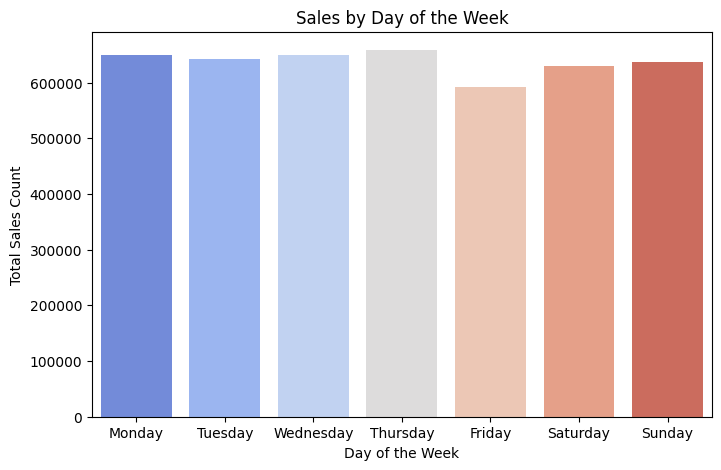

In [376]:
# Weekly trend
weekly_data = df.groupby('Day_of_Week')['Count'].sum().reset_index()
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekly_data['Day_of_Week'] = weekly_data['Day_of_Week'].map(day_map)
plt.figure(figsize=(8, 5))
sns.barplot(x='Day_of_Week', y='Count', data=weekly_data, palette='coolwarm')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Count')
plt.show()

This line creates a new column **'Lag_1'** that contains the sales count from **1 day before** for each observation. The **shift(1)** function shifts the data by **1 row**, aligning each value with its previous day's value.

 Similarly, this creates another column **'Lag_7'** that contains the sales count from **1 week (7 days) before** for each observation. The **shift(7)** shifts the data by **7 rows**, so each value aligns with the sales count from 7 days ago.

In [377]:
# Add lag features
df['Lag_1'] = df['Count'].shift(1)  # Sales count 1 day before
df['Lag_7'] = df['Count'].shift(7)  # Sales count 1 week before

# Drop rows with NaN values due to lagging
df = df.dropna()

This creates a new column **'Rolling_Mean_3'** that calculates the 3-day rolling mean of the sales **('Count')**. The **rolling(window=3)** function creates a **moving window** of **3 days**, and .mean() computes the average of those 3 days. The value for each row will be the mean of the current day and the previous 2 days.

This creates another column **'Rolling_Mean_7'** that computes the **7-day rolling** mean, averaging the current day and the previous 6 days of sales.

In [378]:
# Add rolling average features
df['Rolling_Mean_3'] = df['Count'].rolling(window=3).mean()  # 3-day rolling mean
df['Rolling_Mean_7'] = df['Count'].rolling(window=7).mean()  # 7-day rolling mean

# Drop rows with NaN values due to rolling
df = df.dropna()

In [379]:

# Prepare data (ensure it's time-series indexed)
df.set_index('Date')

,Model,Count,Year,Month,Day,Day_of_Week,Lag_1,Lag_7,Rolling_Mean_3,Rolling_Mean_7
Date,,,,,,,,,,
2016-08-31,M55,1,2016,8,31,2,4.0,17.0,15.666667,105.142857
2016-08-31,M43,1,2016,8,31,2,1.0,653.0,2.000000,12.000000
2016-08-31,M31,23,2016,8,31,2,1.0,8.0,8.333333,14.142857
2016-08-31,M90,31,2016,8,31,2,23.0,25.0,18.333333,15.000000
2016-08-31,M96,19,2016,8,31,2,31.0,3.0,24.333333,17.285714
...,...,...,...,...,...,...,...,...,...,...
2014-01-01,M74,1,2014,1,1,2,384.0,1.0,129.000000,55.857143
2014-01-01,M59,1,2014,1,1,2,1.0,1.0,128.666667,55.857143
2014-01-01,M60,5,2014,1,1,2,1.0,1.0,2.333333,56.428571


In [380]:
df.to_csv('sales_data.csv', index=False)

In [381]:
sales = pd.read_csv('sales_data.csv')

-------------------------------

The code groups the sales data by month, summing the **'Count'** values for each month. It then converts the monthly period index to a timestamp (the first day of each month).

In [412]:
monthly_data = df.groupby(df['Date'].dt.to_period('M'))['Count'].sum()
monthly_data.index = monthly_data.index.to_timestamp()

In [413]:
monthly_data.to_csv('monthly_sales_data.csv', index=True)

In [414]:
monthly_data.head()

Date
2014-01-01     4100
2014-02-01    11078
2014-03-01    12949
2014-04-01    17779
2014-05-01    33452
Freq: MS, Name: Count, dtype: int64

This code creates and fits an **ARIMA model** to the monthly_data series. The model is specified with an order of **(3, 1, 1)**, where:
- **3** is the autoregressive (AR) order, indicating the model uses the **past 3 months' data**.
- **1** is the differencing (I) order, indicating the data is **differenced once** to make it stationary.
- **1** is the moving average (MA) order, indicating the model uses the **past 1 residual** to predict future values.

In [415]:
monthly_model = ARIMA(monthly_data, order=(3, 1, 1))  # Adjust order as needed
monthly_model_fit = monthly_model.fit()

In [416]:
pickle.dump(monthly_model_fit,open('monthly_sales_model.pkl','wb'))

In [417]:
monthly_forecast = monthly_model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
forecast_values = monthly_forecast.predicted_mean
confidence_intervals = monthly_forecast.conf_int()

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28592\2374255081.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


This code plots **actual monthly sales** and **forecasted sales**, with **shaded confidence intervals** to indicate uncertainty in the forecast. It labels the axes, adds a legend, and displays the grid for better visualization.

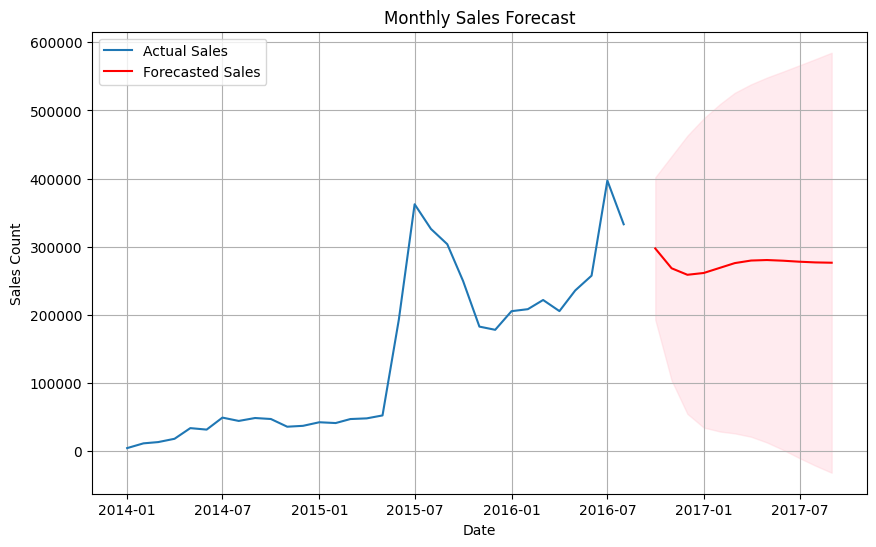

In [418]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.grid()
plt.show()

-------------------------

This code groups the **data by week** (with weeks starting on Sunday) and calculates the **total sales count** (Count) for each week. The to_period('W-SUN') method converts the dates to weekly periods starting from Sunday, and then to_timestamp() converts these periods back to timestamps to make them suitable for plotting or further analysis.

In [389]:
weekly_data = df.groupby(df['Date'].dt.to_period('W-SUN'))['Count'].sum()
weekly_data.index = weekly_data.index.to_timestamp()

In [390]:
weekly_data.to_csv('weekly_sales_data.csv', index=True)


This code defines and fits an **ARIMA model** to the weekly sales data (weekly_data). The ARIMA function is specified with the order **(2, 1, 2)**, which refers to:
- AR (AutoRegressive) order = **2**: The model will use the **last 2 values of the series to predict the next value**.
- I (Integrated) order = **1**: **One differencing operation** is applied to make the series stationary.
- MA (Moving Average) order = **2**: The model will use the **last 2 forecast errors to predict the next value**.

In [391]:
weekly_model = ARIMA(weekly_data, order=(2, 1, 2))  # Adjust ARIMA order based on ACF/PACF
weekly_model_fit = weekly_model.fit()

In [392]:
pickle.dump(weekly_model_fit,open('weekly_sales_model.pkl','wb'))

In [393]:
weekly_data.head()

Date
2013-12-30     402
2014-01-06      90
2014-01-13     840
2014-01-20    1539
2014-01-27    1743
Freq: W-MON, Name: Count, dtype: int64

This code generates a **10-week forecast** using a fitted **ARIMA model**, with future dates calculated from the **last observed date**. It ensures forecasted values are **non-negative** and computes the **confidence intervals for each prediction**. The forecast values and confidence intervals are ready for visualization or further analysis.

In [394]:
steps = 10
weekly_forecast = weekly_model_fit.get_forecast(steps=steps)
forecast_index = pd.date_range(weekly_data.index[-1] + pd.offsets.Week(), periods=steps, freq='W-SUN')
forecast_values = weekly_forecast.predicted_mean
forecast_values = np.maximum(forecast_values, 0)
confidence_intervals = weekly_forecast.conf_int()


This code visualizes the **actual** and **forecasted weekly sales**, displaying the forecasted values as a red line along with the confidence intervals as a shaded region. The plot is customized with labels, a title, a legend, and a grid for better clarity. The forecasted values are plotted for 10 future weeks, ensuring a clear comparison between **historical and predicted sales**.

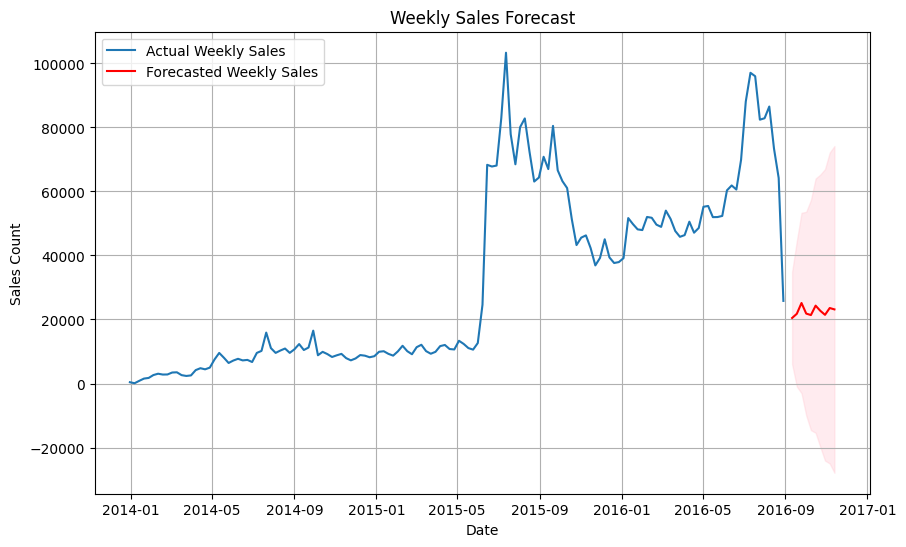

In [395]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_data, label='Actual Weekly Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Weekly Sales', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.grid()
plt.show()

In [396]:
predicted_df = pd.DataFrame({
    "Date": forecast_index,
    "Predicted_Sales": forecast_values,
    "Lower_CI": confidence_intervals.iloc[:, 0],
    "Upper_CI": confidence_intervals.iloc[:, 1]
})

In [397]:
print(predicted_df)

                 Date  Predicted_Sales      Lower_CI      Upper_CI
2016-09-05 2016-09-11     20471.562493   6052.718883  34890.406102
2016-09-12 2016-09-18     21778.483258   -947.696345  44504.662861
2016-09-19 2016-09-25     25147.955089  -3018.880976  53314.791153
2016-09-26 2016-10-02     21842.473728  -9955.819395  53640.766852
2016-10-03 2016-10-09     21381.685368 -14563.200847  57326.571583
2016-10-10 2016-10-16     24323.186161 -15401.899444  64048.271765
2016-10-17 2016-10-23     22712.800706 -19826.391978  65251.993390
2016-10-24 2016-10-30     21453.323095 -24078.537364  66985.183553
2016-10-31 2016-11-06     23582.093818 -24985.371634  72149.559270
2016-11-07 2016-11-13     23153.921240 -27870.113378  74177.955857



The **app.py** file creates a **Flask application** with an API endpoint that receives sales data, processes it using an **ARIMA model**, and returns **forecasted sales values and confidence intervals** in JSON format.

---------------------------